# Table of Context

In [1]:
!pip install catboost
!pip install scipy=='1.10.1'
!pip install optuna
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=a244ff2392c58e476ea19c470302fa1e6baeee3698861b962f4e6e1614189831
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=abb0178d84dfff60f5d704db1c8417a70a1761aaf6c94bbd0611cdbf852d1148
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully buil

In [1]:
# !pip install sklearn-pandas
# !pip install astropy
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
import scipy.stats as stats
import scipy
from time import strptime
warnings.filterwarnings("ignore")
import custom_functions

# Credit score

We have longitudinal data  
Labels can change through time  
A lot of artifacts in the data


In [2]:
# We dont use test because it doesnt have labels
credit_score_train = pd.read_csv('train.csv')
data = credit_score_train.copy()

# DATA an quick look

Variable Description:

- ID: Unique ID of the record
- Customer_ID: Unique ID of the customer
- Month: Month of the year
- Name: The name of the person
- Age: The age of the person
- SSN: Social Security Number of the person
- Occupation: The occupation of the person
- Annual_Income: The Annual Income of the person
- Monthly_Inhand_Salary: Monthly in-hand salary of the person
- Num_Bank_Accounts: The number of bank accounts of the person
- Num_Credit_Card: Number of credit cards the person is having
- Interest_Rate: The interest rate on the credit card of the person
- Num_of_Loan: The number of loans taken by the person from the bank
- Type_of_Loan: The types of loans taken by the person from the bank
- Delay_from_due_date: The average number of days delayed by the person from the date of payment
- Num_of_Delayed_Payment: Number of payments delayed by the person
- Changed_Credit_Card: The percentage change in the credit card limit of the person
- Num_Credit_Inquiries: The number of credit card inquiries by the person
- Credit_Mix: Classification of Credit Mix of the customer
- Outstanding_Debt: The outstanding balance of the person
- Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
- Credit_History_Age: The age of the credit history of the person
- Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
- Total_EMI_per_month: The total EMI per month of the person
- Amount_invested_monthly: The monthly amount invested by the person
- Payment_Behaviour: The payment behaviour of the person
- Monthly_Balance: The monthly balance left in the account of the person
- Credit_Score: The credit score of the person

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# DATA CLEANING

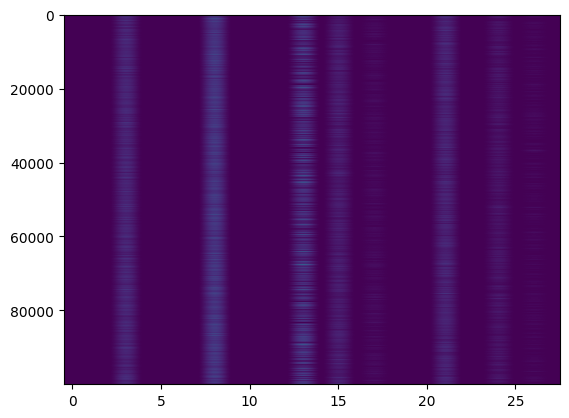

In [4]:
plt.imshow(data.isna().to_numpy(),aspect='auto')

## NUMERICAL FEATURES

__NUM FEATURES:__
Age, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card,
Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit,
Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Total_EMI_per_month,
Amount_invested_monthly, Monthly_Balance

First we have a lot of features that should be numerical but due to they we inputed by hand they dont, lets corect it

In [5]:
num_to_correct = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
                  'Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
for col in num_to_correct:
    pattern = re.compile('[^\d.-]+')
    data[col] = data[col].apply(lambda x: re.sub(pattern,"",x) if not isinstance(x,float) else x)

In [6]:
for col in num_to_correct:
    try:
        data[col] = data[col].astype(float)
    except:
        print(col)

Changed_Credit_Limit


We cant convert 'Changed_Credit_Limit' because it has empty rows after cleaning. Before cleaning it was just '-',  
i convert it to __zero__ becouse we dont have any zero values that is strange  

In [7]:
mask = data.Changed_Credit_Limit== ''
data.loc[mask,'Changed_Credit_Limit'] = 0
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(float)

Now we convert __Credit_History_Age__ into month and fill missing values

In [8]:
custom_functions.preprocessing_history(data)

In [9]:
data.describe().round(2)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.00,100000.00,84998.00,100000.00,100000.00,100000.00,100000.00,100000.00,92998.00,100000.00,98035.00,100000.00,100000.00,100000.00,100000.00,95521.00,9.880000e+04
mean,110.65,176415.70,4194.17,17.09,22.47,72.47,3.01,21.07,30.92,10.17,27.75,1426.22,32.29,221.20,1403.12,637.41,-3.036437e+22
std,686.24,1429618.05,3183.69,117.40,129.06,466.42,62.65,14.86,226.03,6.88,193.18,1155.13,5.12,99.68,8306.04,2043.32,3.181295e+24
min,-500.00,7005.93,303.65,-1.00,0.00,1.00,-100.00,-5.00,-3.00,-6.49,0.00,0.23,20.00,1.00,0.00,0.00,-3.333333e+26
25%,24.00,19457.50,1625.57,3.00,4.00,8.00,1.00,10.00,9.00,4.97,3.00,566.07,28.05,144.00,30.31,74.53,2.700900e+02
50%,33.00,37578.61,3093.75,6.00,5.00,13.00,3.00,18.00,14.00,9.25,6.00,1166.16,32.31,219.00,69.25,135.93,3.367200e+02
75%,42.00,72790.92,5957.45,7.00,7.00,20.00,5.00,28.00,18.00,14.66,9.00,1945.96,36.50,302.00,161.22,265.73,4.702200e+02
max,8698.00,24198062.00,15204.63,1798.00,1499.00,5797.00,1496.00,67.00,4397.00,36.97,2597.00,4998.07,50.00,404.00,82331.00,10000.00,1.602040e+03


- negative values in  __Age__
- negative values in __Num_Bank_Accounts__
- negative values in __Num_of_Loan__
- negative values in __Num_of_Delayed_Payment__

In [10]:
# Remove negative values
for col in ['Age','Num_Bank_Accounts','Num_of_Loan','Num_of_Delayed_Payment']:
    data[data[col]<0][col] = np.nan

## Remove outliers

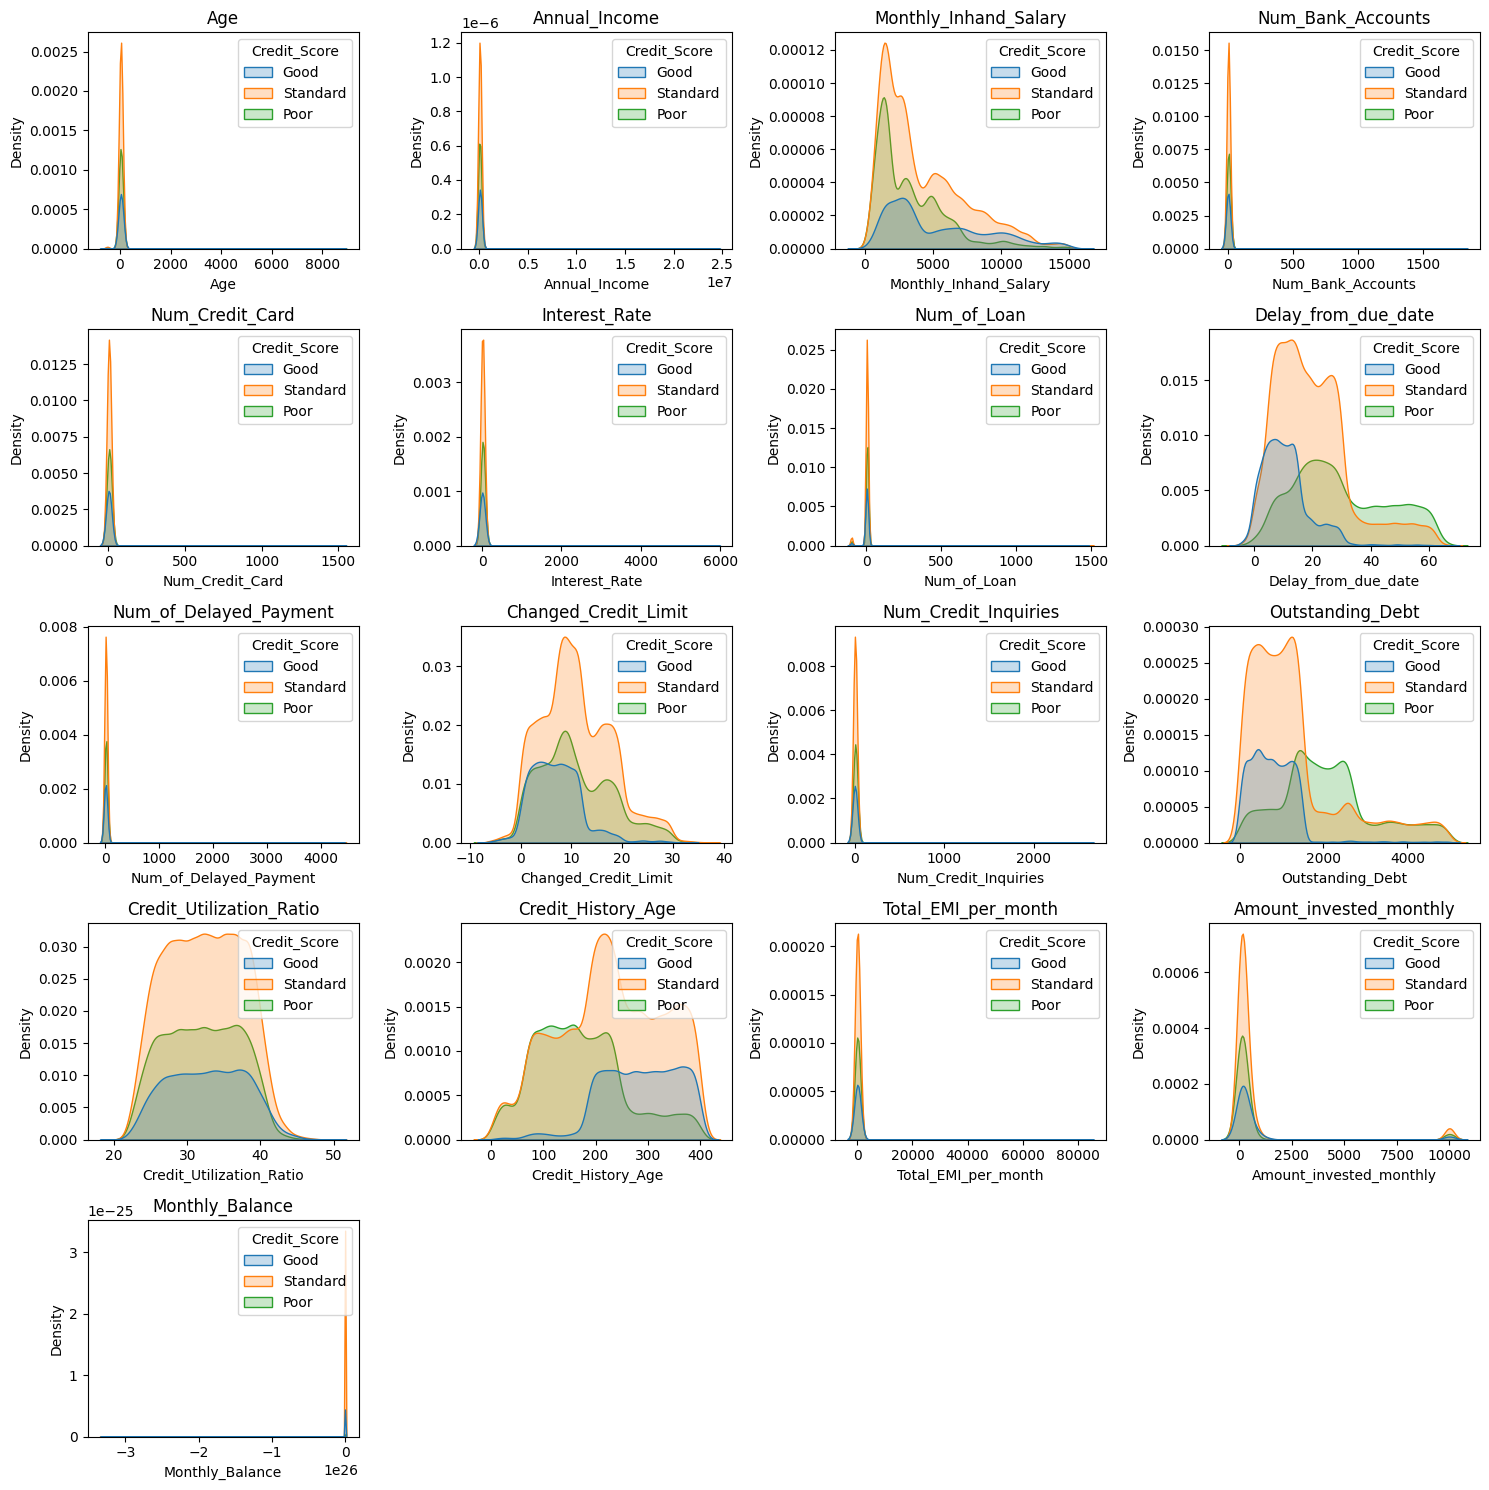

In [11]:
num_cols = data.select_dtypes(include=['int', 'float']).columns
plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data[col],shade=True, hue=data["Credit_Score"])

plt.tight_layout()

In [12]:
cols2filter = ['Age','Annual_Income','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
               'Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries',
               'Amount_invested_monthly','Total_EMI_per_month','Monthly_Balance']

for col in cols2filter:
    custom_functions.reomve_outliners_by_group_min_max(data, 'Customer_ID', col)

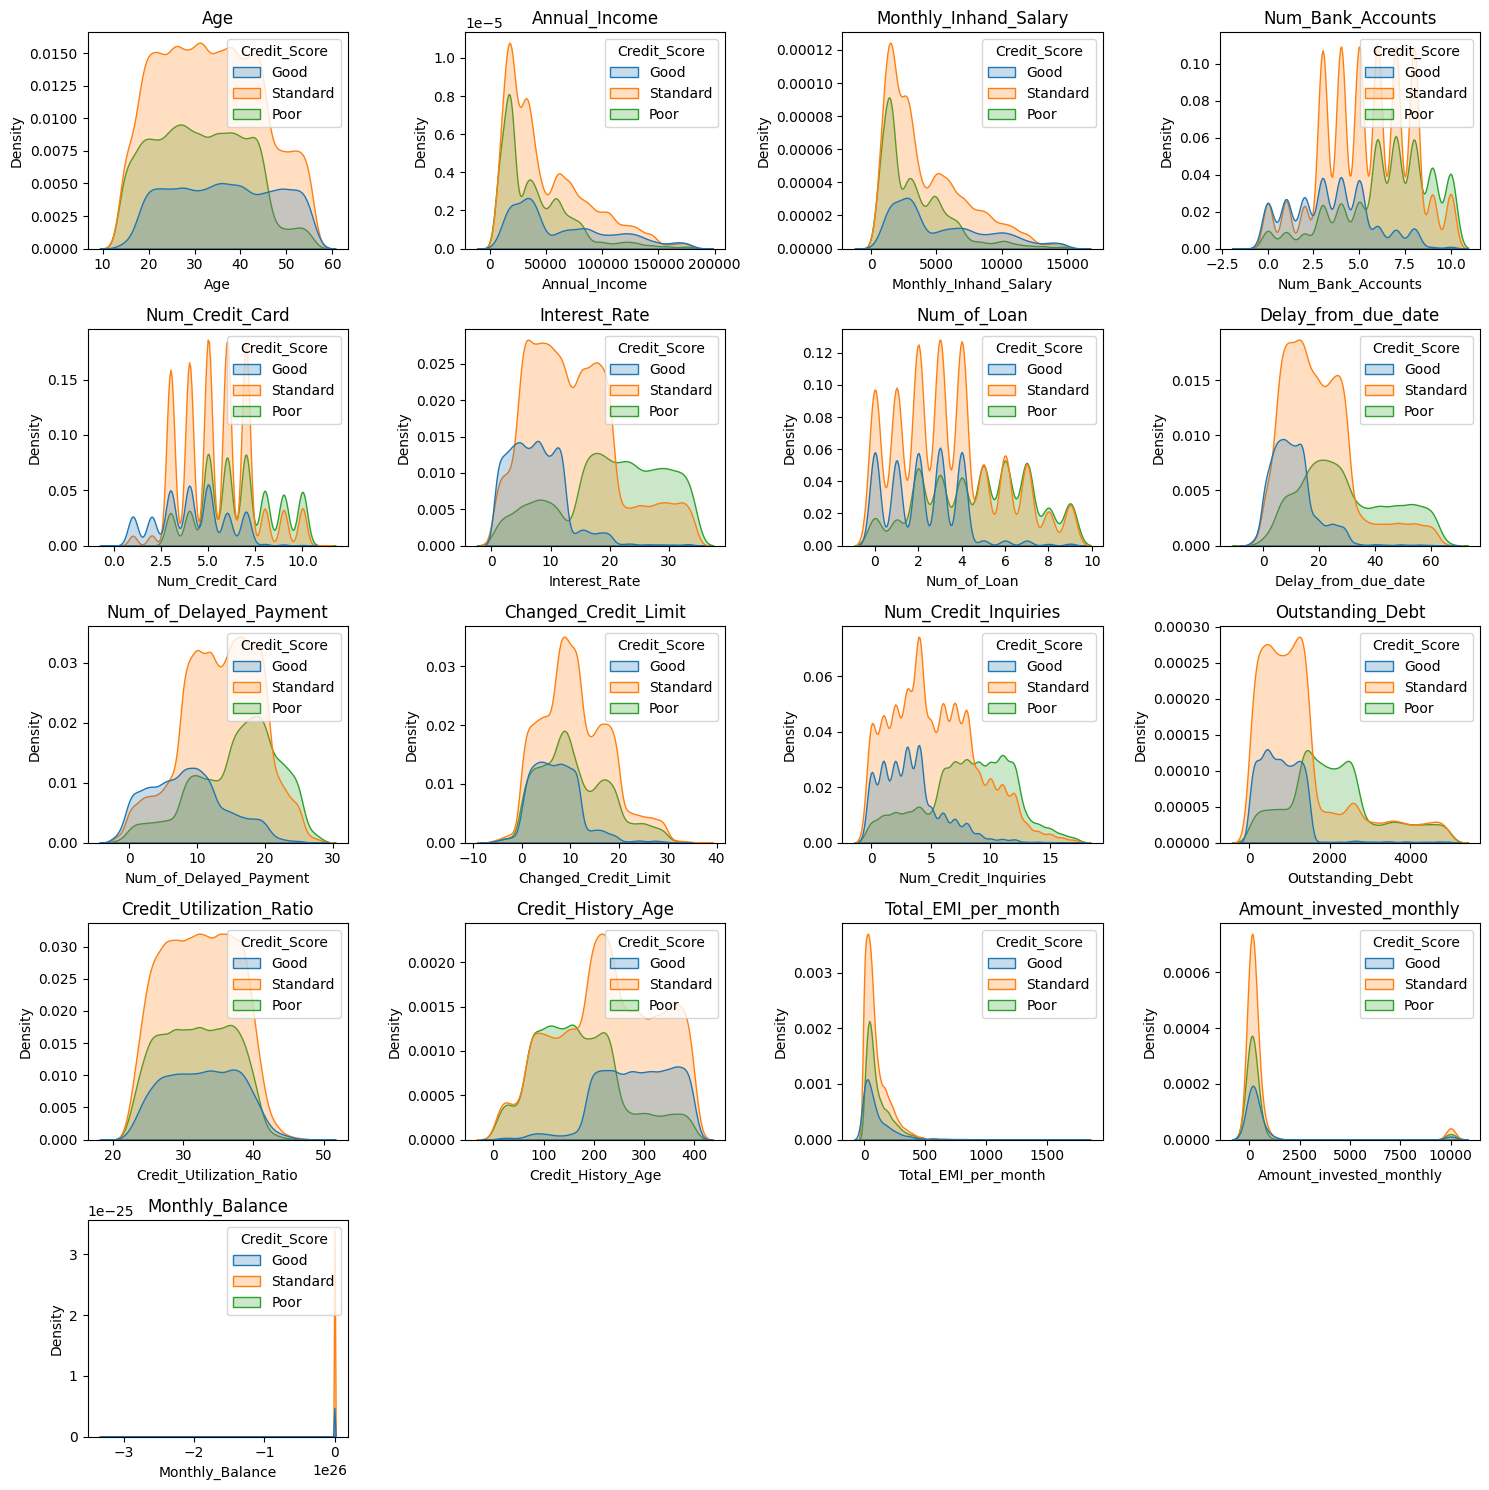

In [13]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data[col],shade=True, hue=data["Credit_Score"])

plt.tight_layout()

## Handling Missing Values

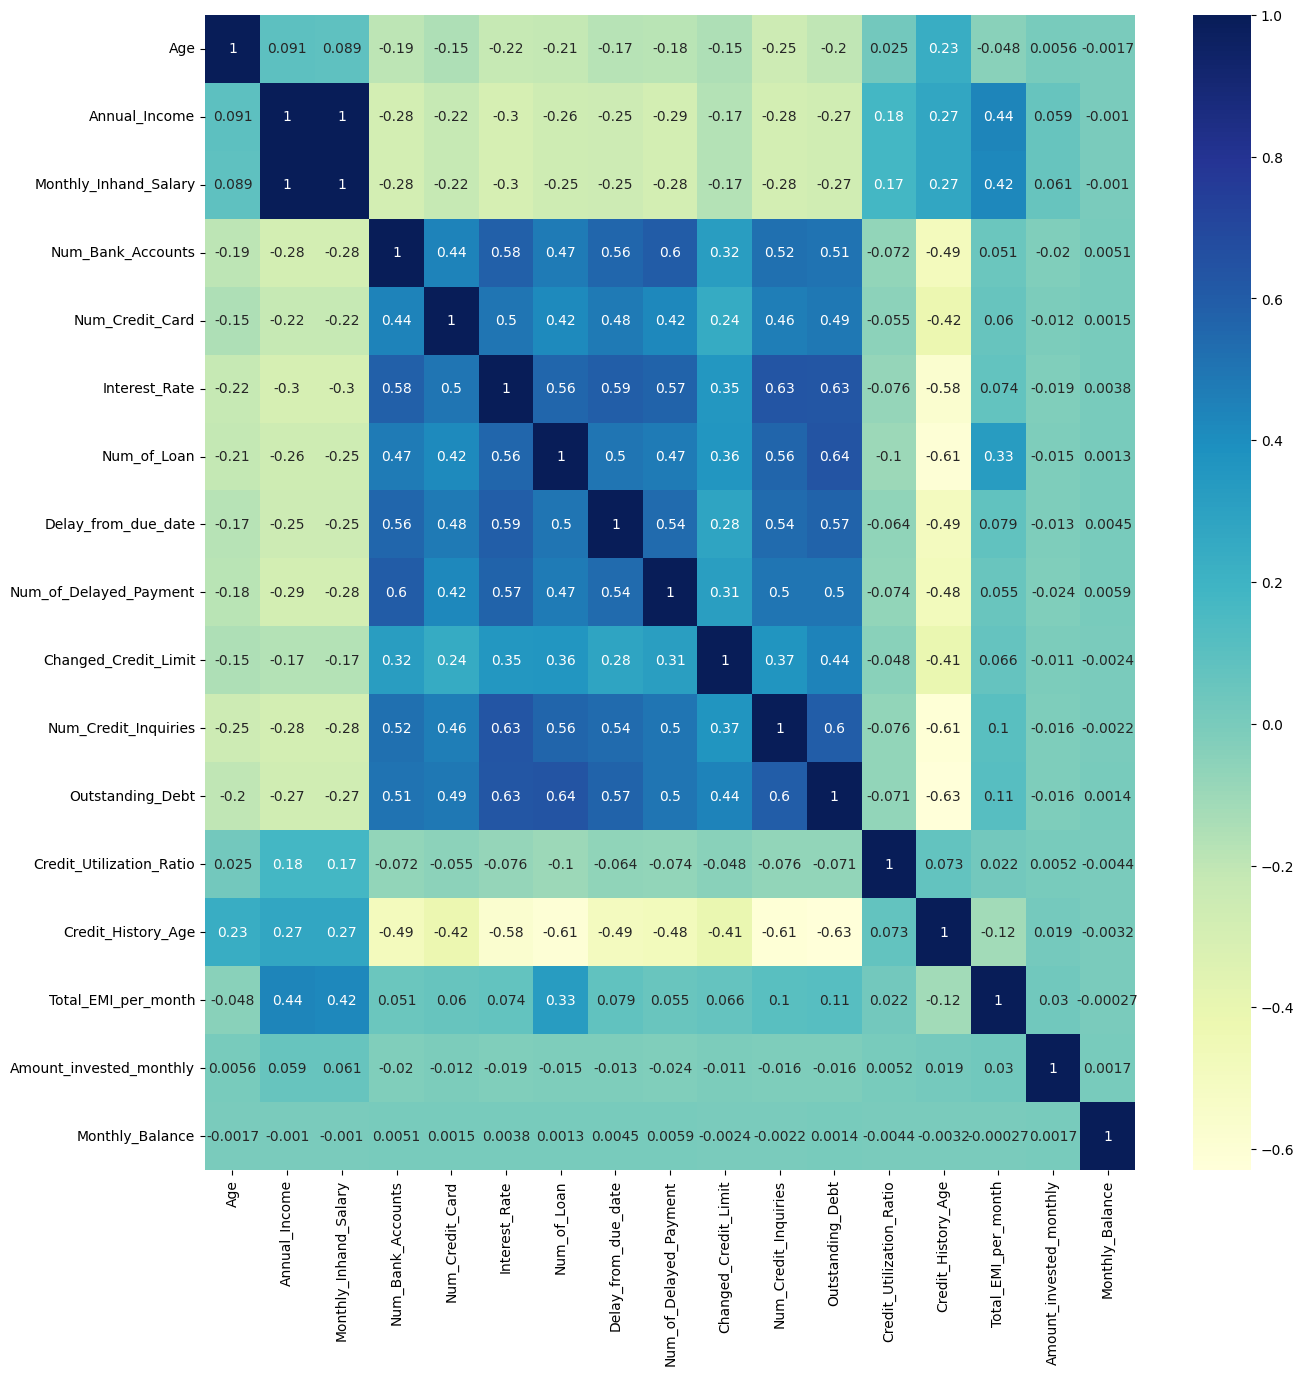

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

- Annual_Income и Monthly_Inhand_Salary имеют корреляцию 1, те один из солбцом можно выкинуть

In [15]:
# Without hesitations drop Annual_Income
data = data.drop(['Annual_Income'],axis=1)

### Gap analysis

In [16]:
num_cols = list(data.select_dtypes(include=['int', 'float']).columns)
num_cols.append('Customer_ID')

In [17]:
grouped_missing = data[num_cols].groupby('Customer_ID').apply(lambda g: g.isna().sum())
grouped_missing = grouped_missing.drop(['Customer_ID'],axis=1)
grouped_missing = grouped_missing.reset_index()

In [18]:
binary_missing = grouped_missing.copy()
for col in binary_missing.columns[1:]:
    mask = binary_missing[col].isin([8])
    binary_missing.loc[mask,col] = 1
    binary_missing.loc[~mask,col] = 0

In [19]:
binary_missing.sum()

Customer_ID                 CUS_0x1000CUS_0x1009CUS_0x100bCUS_0x1011CUS_0x...
Age                                                                         0
Monthly_Inhand_Salary                                                       0
Num_Bank_Accounts                                                           0
Num_Credit_Card                                                             0
Interest_Rate                                                               0
Num_of_Loan                                                                 0
Delay_from_due_date                                                         0
Num_of_Delayed_Payment                                                      0
Changed_Credit_Limit                                                        0
Num_Credit_Inquiries                                                        0
Outstanding_Debt                                                            0
Credit_Utilization_Ratio                                        

Consequently we removed all outliers and still we have at list one observation for each customer

In [20]:
observed_var = data[num_cols].groupby('Customer_ID').apply(lambda g: g.std()/abs(g.mean())).mean().round(5).sort_values()
observed_var

Interest_Rate               0.00000
Num_of_Loan                 0.00000
Outstanding_Debt            0.00000
Monthly_Inhand_Salary       0.00222
Num_Credit_Card             0.00266
Num_Bank_Accounts           0.00432
Age                         0.00886
Credit_History_Age          0.01776
Total_EMI_per_month         0.05193
Credit_Utilization_Ratio    0.15238
Num_Credit_Inquiries        0.20981
Monthly_Balance             0.24155
Changed_Credit_Limit        0.72622
Amount_invested_monthly     1.09778
Delay_from_due_date             inf
Num_of_Delayed_Payment          inf
dtype: float64

We got inf value for __Delay_from_due_date__ because in some cases we have zero mean so lets check just std (scale: days)

In [21]:
data[num_cols].groupby('Customer_ID').apply(lambda g: g.std())['Delay_from_due_date'].mean()

1.529495463915025

1.5 days is significant

Values in some columns dont change or change just a bit within the year. This columns (__Interest_Rate__,__Num_of_Loan__,__Outstanding_Debt__) we fill with mode.

For all columns we propagate previous values to missing

In [22]:
data.loc[:,num_cols] = data.groupby(['Customer_ID'])[num_cols].fillna(method='ffill')

In [23]:
data[num_cols].isna().sum()

Age                          393
Monthly_Inhand_Salary       2196
Num_Bank_Accounts            163
Num_Credit_Card              290
Interest_Rate                247
Num_of_Loan                  587
Delay_from_due_date            0
Num_of_Delayed_Payment      1034
Changed_Credit_Limit           0
Num_Credit_Inquiries         439
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Total_EMI_per_month          370
Amount_invested_monthly      591
Monthly_Balance              310
Customer_ID                    0
dtype: int64

## CATEGORICAL FEATURES

In [24]:
data = data.drop(['ID','Name','SSN'],axis=1)

### Type of Loan

In [25]:
data.groupby('Customer_ID')['Type_of_Loan'].apply(lambda g: g.isna().sum()).value_counts()

0    11074
8     1426
Name: Type_of_Loan, dtype: int64

Прупущенные значения в каждый из 8 меяцев говорит о том что это не пропупск а отсутствие кредита

In [26]:
data['Type_of_Loan'] = data['Type_of_Loan'].fillna('No Loan')
unique_types = list(data['Type_of_Loan'].value_counts().index[1:10])
unique_types

['Not Specified',
 'Credit-Builder Loan',
 'Personal Loan',
 'Debt Consolidation Loan',
 'Student Loan',
 'Payday Loan',
 'Mortgage Loan',
 'Auto Loan',
 'Home Equity Loan']

In [27]:
for loan in unique_types:
    data[loan] = data['Type_of_Loan'].str.contains(loan).astype(int)
data = data.drop(['Type_of_Loan'],axis=1)

### Filtering erros

In [28]:
data['Credit_Mix'] = data['Credit_Mix'].replace('_',np.nan)
data['Occupation'] = data['Occupation'].replace('_______',np.nan)
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace('!@9#%8',np.nan)
data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].replace('NM',np.nan)

### Input Missing

In [29]:
cat_fill_col = ['Credit_Mix','Occupation','Payment_Behaviour','Payment_of_Min_Amount']
data.loc[:,cat_fill_col] = data.groupby(['Customer_ID'])[cat_fill_col].fillna(method='ffill')

## Drop others

In [30]:
data = data.dropna()
data.shape

(90602, 32)

# ML

In [31]:
# Metrics
from sklearn.metrics import f1_score, accuracy_score

from sklearn.model_selection import train_test_split
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#Balancers
from imblearn import FunctionSampler
#Pipline
from imblearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import gen_features
# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

## POOL MODEL

In [32]:
# Preparing data to fit in pool model
pool_data = data.copy()
pool_data= pool_data.drop(['Customer_ID'],axis=1)

In [33]:
X, y = pool_data.drop(['Credit_Score'],axis=1), pool_data['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True,random_state=100)

### MODEL FOR ALL CLASSES

In [34]:
cat_features = list(X_train.select_dtypes(object).columns)
ct = ColumnTransformer([('encode_cats', OneHotEncoder(drop='first',sparse=False, dtype='int'), cat_features)],
                       remainder='passthrough')

In [35]:
model = Pipeline([
    ('ct',ct),
    ('scaller',StandardScaler()),
    ('rf', RandomForestClassifier())
])


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'f1-macro score: {f1_score(y_test, y_pred,average="macro")}')

f1-macro score: 0.7982474901070015


In [36]:
accuracy_score(y_test, y_pred)

0.8069166192849259

### BINARY MODELS

In [37]:
y_train_bin, y_test_bin = (y_train=='Poor').astype(int),(y_test=='Poor').astype(int)

In [38]:
cat_features = list(X.select_dtypes(object).columns)
ct = ColumnTransformer([('encode_cats', OneHotEncoder(drop='first',sparse=False, dtype='int'), cat_features)],
                       remainder='passthrough')

### Naive Bayes

In [39]:
model = Pipeline([
    ('ct',ct),
    ('scaller',MinMaxScaler()),
    ('rf', GaussianNB()),
])

model.fit(X_train, y_train_bin)
y_pred = model.predict(X_test)

print(f'Score: {f1_score(y_test_bin,y_pred)}')

Score: 0.5390511228634934


### Logistic Regression

In [40]:
model = Pipeline([
    ('ct',ct),
    ('scaller',StandardScaler()),
    ('rf', LogisticRegressionCV(fit_intercept=False)),
])


model.fit(X_train, y_train_bin)
y_pred = model.predict(X_test)

print(f'Score: {f1_score(y_test_bin, y_pred)}')

Score: 0.6527494908350305


### Catboost

In [41]:
from google.colab import output
output.enable_custom_widget_manager()

In [42]:
num_cols = X_train.select_dtypes(['int','float']).columns
cat_features = list(X_train.select_dtypes(object).columns)

gen = gen_features(columns =np.array(num_cols).reshape(-1, 1).tolist(),classes = [MinMaxScaler])
gen_2 = gen_features(columns =np.array(cat_features).reshape(-1, 1).tolist(),classes = [None])

mapper = DataFrameMapper(gen+gen_2,input_df=True, df_out=True)


class CustomCatBoostClassifier(CatBoostClassifier):
    def fit(self, X, y=None):
        X_cat, X_val, y_cat, y_val = train_test_split(X, y, test_size=0.33, stratify=y,shuffle=True,random_state=100)
        return super().fit(
            X = X_cat,
            y=y_cat,
            cat_features= list(X_cat.select_dtypes(object).columns),
            eval_set=(X_val,y_val),
            verbose =False,
            plot=True,
        )

model = Pipeline([
    ('scaller',mapper),
    ('cb', CustomCatBoostClassifier())
])
model.fit(X_train, y_train_bin)

y_pred = model.predict(X_test)
print(f'Score: {f1_score(y_test_bin, y_pred)}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Score: 0.7382438618393674


### Random Forest

In [43]:
model = Pipeline([
    ('ct',ct),
    ('scaller',StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])


model.fit(X_train, y_train_bin)
y_pred = model.predict(X_test)
print(f'Score: {f1_score(y_test_bin, y_pred)}')

Score: 0.7924441106810698


In [44]:
accuracy_score(y_test_bin, y_pred)

0.8798287568146091

### Feature selection and Feature Eniginering

In [45]:
balancer = FunctionSampler(func=custom_functions.reweighting, validate=False)

In [46]:
cat_features = list(X.select_dtypes(object).columns)

cat_features.remove('Month') # Убираем заранее месяц так как мы его будем перводить в число

ct = ColumnTransformer([('encode_cats', OneHotEncoder(drop='first',sparse=False, dtype='int'), cat_features)],
                       remainder='passthrough')
model = Pipeline([
    ('month',custom_functions.MonthTransformer()), # перевод месяца в число
    ('balancer',balancer), # балансировка датасета
    ('ct',ct),
    ('scaller',StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

model.fit(X_train, y_train_bin)
y_pred = model.predict(X_test)
print(f'Score: {f1_score(y_test_bin, y_pred)}')

Score: 0.8192184213439611


In [47]:
accuracy_score(y_test_bin, y_pred)

0.8907655774440617

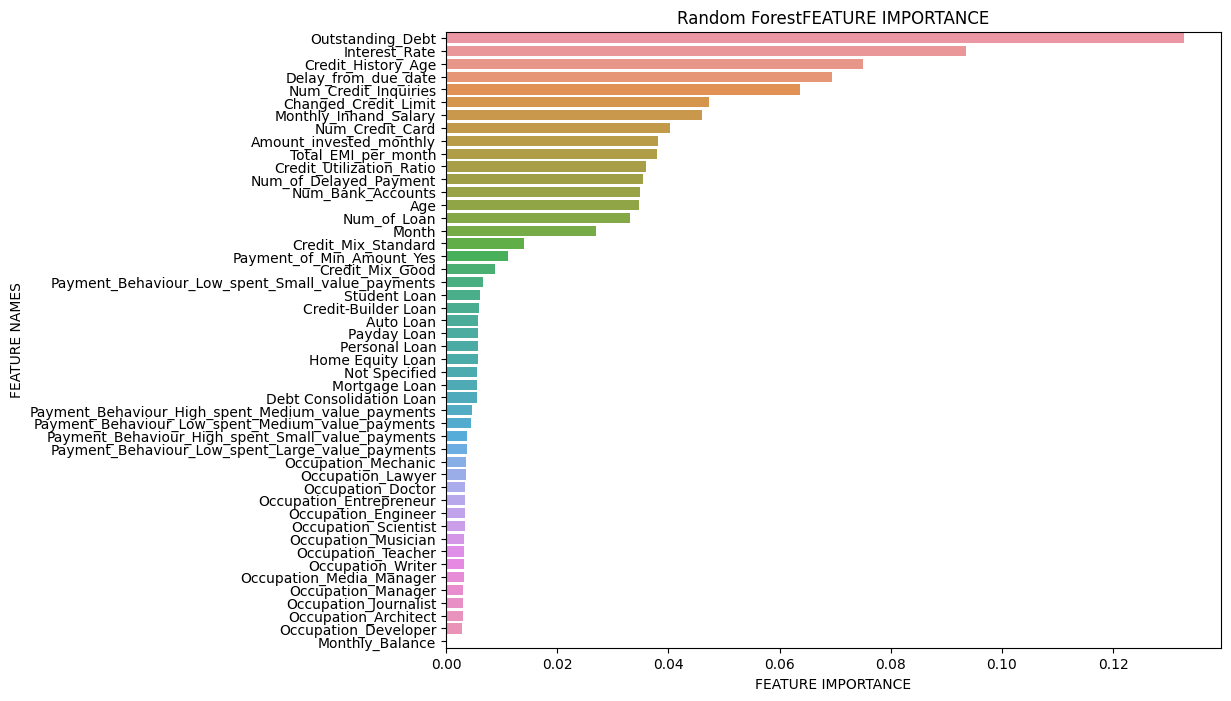

In [48]:
importance = model['rf'].feature_importances_
names = model['ct'].get_feature_names_out()
patt = re.compile(r'encode_cats__||remainder__')
names = [patt.sub('', feature) for feature in names]
importance_1 = custom_functions.plot_feature_importance(importance,names,'Random Forest')

## Model with lags

In [49]:
# Preparing data to fit laged model
data_with_lags = data.copy()
data_with_lags.Credit_Score = (data_with_lags.Credit_Score=='Poor').astype(int)

# I've chosen variables that most varinge through the time
cols_to_lag = ['Credit_Score','Delay_from_due_date','Num_of_Delayed_Payment',
               'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_Utilization_Ratio']
lags = data_with_lags.groupby(['Customer_ID'])[cols_to_lag].shift(1)
cols_to_lag = [c+'_1' for c in cols_to_lag]
lags.columns = cols_to_lag

data_with_lags = data_with_lags.join(lags)
data_with_lags = data_with_lags.dropna()
data_with_lags= data_with_lags.drop('Customer_ID',axis=1)

In [50]:
X_lags, y_lags = data_with_lags.drop(['Credit_Score'],axis=1), data_with_lags['Credit_Score']
X_train_lags, X_test_lags, y_train_lags, y_test_lags = train_test_split(X_lags, y_lags, test_size=0.33,shuffle=True,random_state=100)

In [51]:
np.corrcoef(X_train_lags['Credit_Score_1'],y_train_lags)

array([[1.        , 0.74077035],
       [0.74077035, 1.        ]])

In [52]:
cat_features = list(X_lags.select_dtypes(object).columns)
cat_features.remove('Month')
ct = ColumnTransformer([('encode_cats', OneHotEncoder(drop='first',sparse=False, dtype='int'), cat_features)],
                       remainder='passthrough')

### Naive Bayes

In [53]:
model = Pipeline([
    ('month',custom_functions.MonthTransformer()), # перевод месяца в число
    ('balancer',balancer), # балансировка датасета
    ('ct',ct),
    ('scaller',MinMaxScaler()),
    ('rf', GaussianNB()),
])

model.fit(X_train_lags, y_train_lags)
y_pred = model.predict(X_test_lags)

print(f'Score: {f1_score(y_test_lags,y_pred)}')

Score: 0.6853515391064798


### Logistic Regression

In [54]:
model = Pipeline([
    ('month',custom_functions.MonthTransformer()), # перевод месяца в число
    ('balancer',balancer), # балансировка датасета
    ('ct',ct),
    ('scaller',StandardScaler()),
    ('rf', LogisticRegressionCV(fit_intercept=False)),
])


model.fit(X_train_lags, y_train_lags)
y_pred = model.predict(X_test_lags)

print(f'Score: {f1_score(y_test_lags, y_pred)}')

Score: 0.8196272644337287


### Catboost

In [55]:
num_cols = X_train_lags.select_dtypes(['int','float']).columns
cat_features = list(X_train_lags.select_dtypes(object).columns)

gen = gen_features(columns =np.array(num_cols).reshape(-1, 1).tolist(),classes = [MinMaxScaler])
gen_2 = gen_features(columns =np.array(cat_features).reshape(-1, 1).tolist(),classes = [None])

mapper = DataFrameMapper(gen+gen_2,input_df=True, df_out=True)

model = Pipeline([
    ('scaller',mapper),
    ('cb', CustomCatBoostClassifier())
])
model.fit(X_train_lags, y_train_lags)

y_pred = model.predict(X_test_lags)
print(f'Score: {f1_score(y_test_lags, y_pred)}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Score: 0.8343997952393141


### Random Forest

In [56]:
model = Pipeline([
    ('month',custom_functions.MonthTransformer()), # перевод месяца в число
    ('balancer',balancer), # балансировка датасета
    ('ct',ct),
    ('scaller',StandardScaler()),
    ('rf', RandomForestClassifier())
])


model.fit(X_train_lags, y_train_lags)
y_pred = model.predict(X_test_lags)
print(f'Score: {f1_score(y_test_lags, y_pred)}')

Score: 0.8423511585327357


In [57]:
accuracy_score(y_test_lags, y_pred)

0.9031194226740126

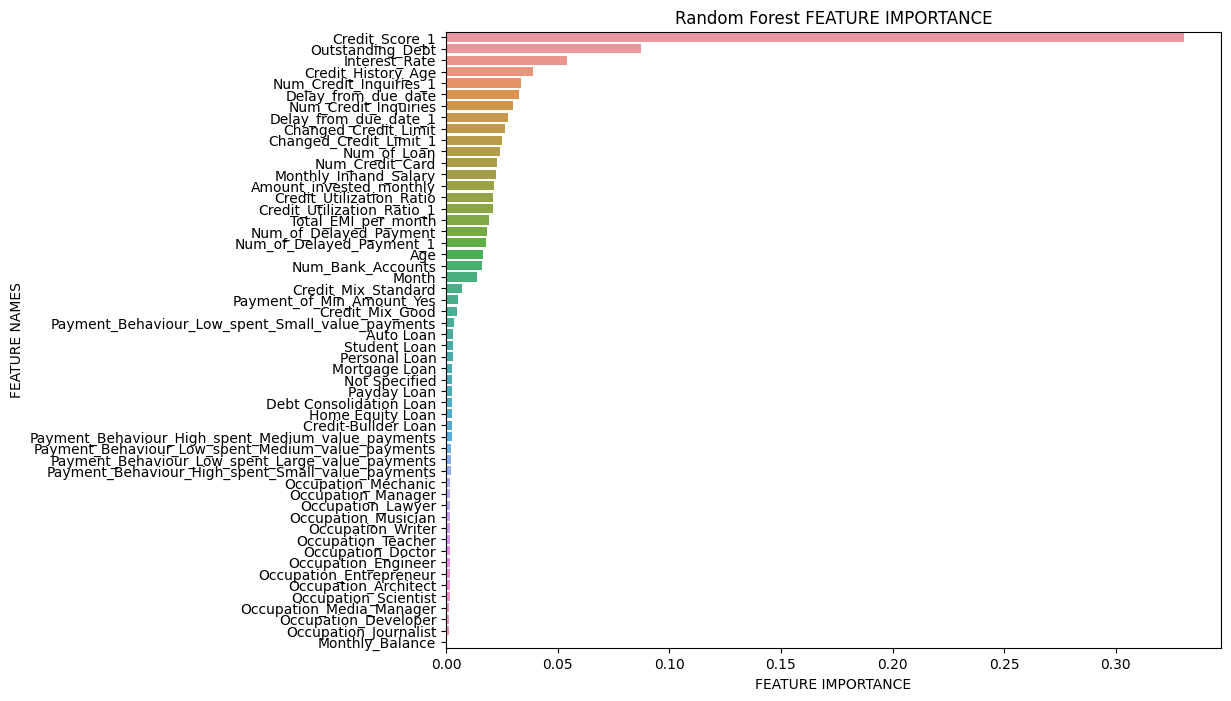

In [58]:
importance = model['rf'].feature_importances_
names = model['ct'].get_feature_names_out()
patt = re.compile(r'encode_cats__||remainder__')
names = [patt.sub('', feature) for feature in names]
importance = custom_functions.plot_feature_importance(importance,names,'Random Forest ')

We obtained a good quality of the models, so lets sum up results before we try to tune this models.  

First we tried dont use time structure in the data, thats alow us make decisions for people after one month in the bank. On the other hand, if we use it, only one lag of target columns can predict about 75% of cases. So, it up to us what model to choose and it depends on the circumstances.

I choose to use data without lags, because when we use credit score that was already gotten, we use expert knowledge more that we get from behavior of customers. Moreover, in the fiance sphere its more important to indicate bad caeses as soon as posible espetialy for new clients that have short history.

Feature importance from the Random Forest show us that only numerical features are important for predicton, so i choose only them to reduce sparsity of the data.

Encoding month as an number improve quality of models.

Oversampling also gave significant improvment

# Tuning Models

In [59]:
# import optuna
# from optuna.visualization import plot_optimization_history
# from sklearn.model_selection import cross_val_score

We make all preparations not into pipline because its would be too time consuming when we do it while tuning

In [60]:
# X_final = X[importance_1[:16].feature_names.values]
# # Replace Month
# X_final.Month = X_final.Month.apply(lambda x: strptime(x,'%B').tm_mon)
# # Oversampling
# X_final,y_final = custom_functions.reweighting(X_final,(y=='Poor').astype(int))
# # Devide into train and test
# X_train_f ,X_test_f,y_train_f, y_test_f = train_test_split(X_final,y_final,random_state=42,shuffle=True,stratify=y_final)
# #Scaling
# scaller = MinMaxScaler().fit(X_train_f)
# X_train_f = pd.DataFrame(scaller.transform(X_train_f),columns=X_train_f.columns)
# X_test_f = pd.DataFrame(scaller.transform(X_test_f),columns=X_train_f.columns)

### Random Forest

In [61]:
# rf = RandomForestClassifier(n_jobs=-1,random_state=42)
# param =  {
#         'n_estimators': optuna.distributions.IntDistribution( 50, 1000),
#         'criterion': optuna.distributions.CategoricalDistribution(['gini', 'entropy', 'log_loss']),
#         'max_depth': optuna.distributions.IntDistribution(1, 5),
#     }
# optuna_search = optuna.integration.OptunaSearchCV(rf, param,cv=5,n_jobs=-1,n_trials=100,scoring='f1')
# optuna_search.fit(X_train_f, y_train_f)

### Catboost

In [62]:
# def objective(trial):
#     X_cat, X_val, y_cat, y_val = train_test_split(X_train_f, y_train_f, test_size=0.33,
#                                                   stratify=y_train_f,shuffle=True,random_state=42)
#     params = {
#         "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
#         "depth": trial.suggest_int("depth", 1, 10),
#         "subsample": trial.suggest_float("subsample", 0.05, 1.0),
#         "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
#         "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
#     }
#     model = cb.CatBoostRegressor(**params, silent=True)
#     model.fit(X_cat, y_cat)
#     predictions = model.predict(X_val)
#     f1 = f1_score(y_val, predictions)
#     return f1

In [63]:
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

In [64]:
# print(study.best_value)
# print(study.best_params)

# NeuralFCA

In [65]:
import torch
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
import neural_lib as nl
import networkx as nx
from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [66]:
y_bin = (y =='Poor').astype(int)

In [67]:
def build_ConceptNetwork(train_data, train_target, concepts_count, score_func=f1_score, score_name='f1_score'):
    K_train = FormalContext.from_pandas(train_data)
    L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)

    for c in L:
        y_preds = np.zeros(K_train.n_objects)
        y_preds[list(c.extent_i)] = 1
        c.measures[score_name] = score_func(train_target, y_preds)

    best_concepts = list(L.measures[score_name].argsort()[::-1][:concepts_count])
    assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

    cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(train_target)))
    return K_train, L, cn

In [68]:
def visualizer(cn, save=False, title=True):
    fig, ax = plt.subplots(figsize=(20,8))

    edge_weights = cn.edge_weights_from_network()

    vis = LineVizNx(
        node_label_font_size=14,
        node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
        edge_cmap="hsv"
        )

    vis.draw_poset(
        cn.poset, ax=ax, node_color='black',
        flg_node_indices=False,
        node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
        edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
        edge_cmap=plt.cm.RdBu,
    )
    nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

    if title:
        plt.title('Neural network with fitted edge weights', size=24, loc='center')
    plt.tight_layout()
    plt.subplots_adjust()
    if save:
        plt.savefig('fitted_network.png')
    plt.show()

## Simple binarization


Our first strategy is just devide every variable into 5 bins with the same width and OnehotEncoder for categorical features. With this strategy we get 25 columns.

In [103]:
X_final0 = X[importance_1[:5].feature_names.values].copy()
X_bin0 = custom_functions.binarizer(X_final0)
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_bin0, y_bin, test_size=0.2, random_state=42,stratify=y_bin)

In [104]:
K_train_0, L_0, cn_0 = build_ConceptNetwork(X_train0, y_train0, concepts_count=15)

In [105]:
cn_0.fit(X_train0, y_train0)

print('Class predictions \n', cn_0.predict(X_test0).numpy().astype(bool))
print('True classes \n', y_test0.values)

print("\nF1 score =", f1_score(y_test0.values, cn_0.predict(X_test0).numpy()))

Class predictions 
 [False  True  True ...  True False  True]
True classes 
 [0 1 1 ... 1 0 1]

F1 score = 0.6474979264583909


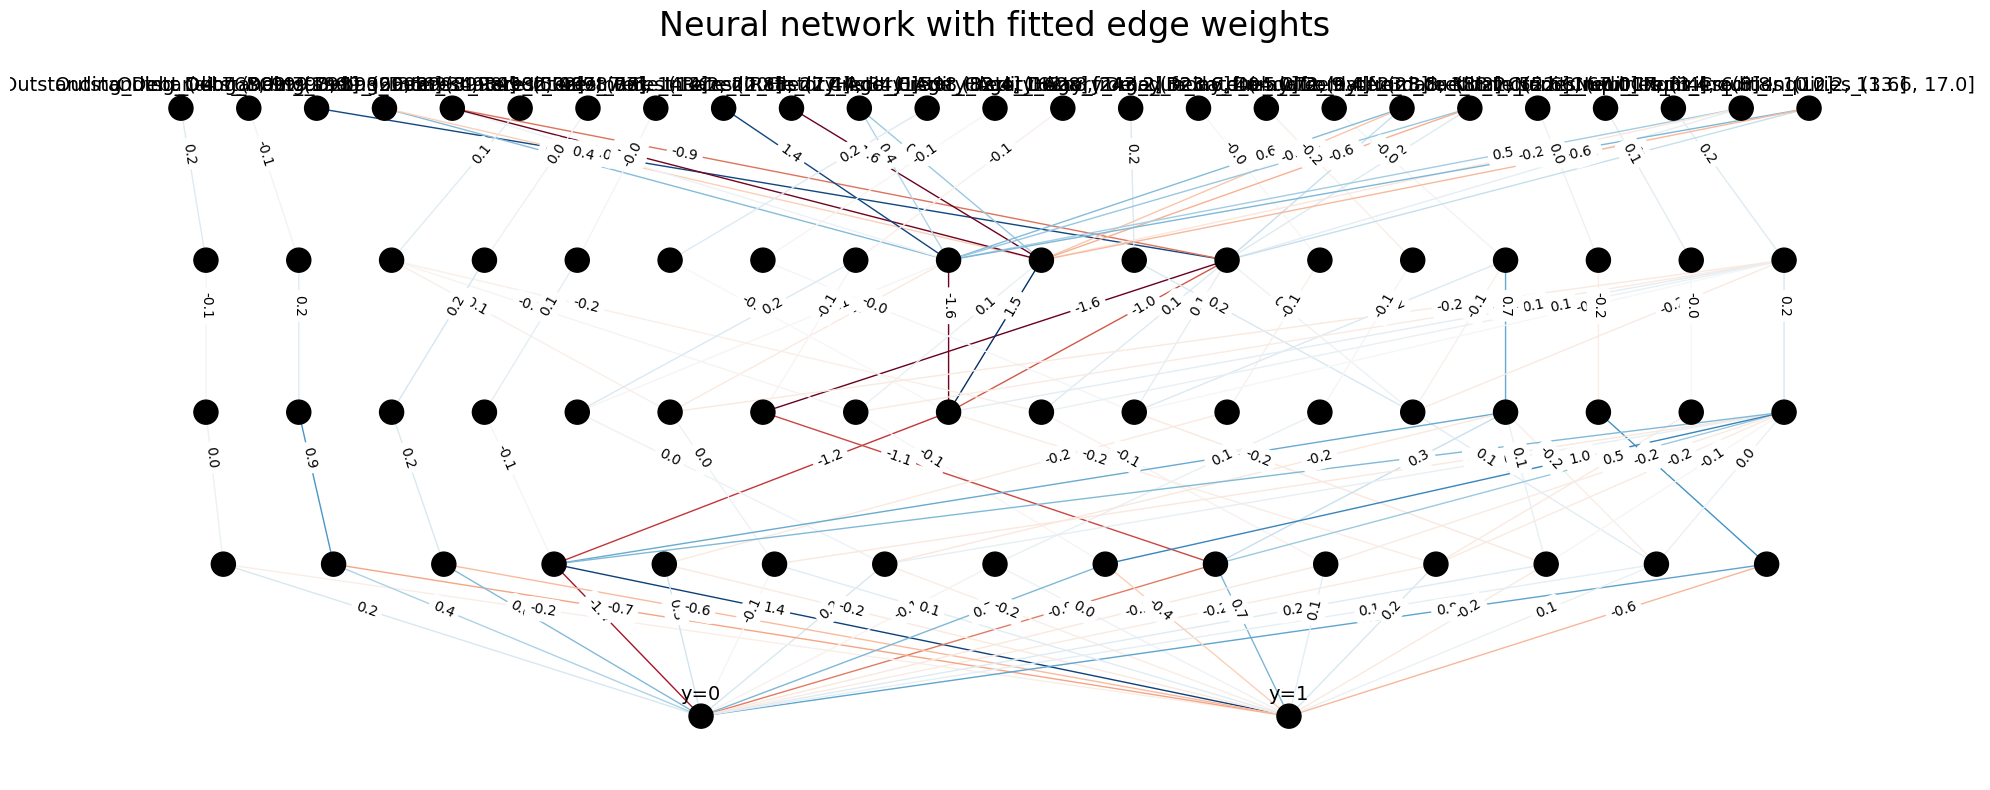

In [106]:
visualizer(cn_0,save=True)

## Only 3 Variables

Lets try to reduce number of columns

In [107]:
X_final1 = X[importance_1[:3].feature_names.values].copy()
X_bin1 = custom_functions.binarizer(X_final1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bin1, y_bin, test_size=0.2, random_state=42,stratify=y_bin)

In [108]:
K_train_1, L_1, cn_1 = build_ConceptNetwork(X_train1, y_train1, concepts_count=15)

In [109]:
cn_1.fit(X_train1, y_train1)

print('Class predictions \n', cn_1.predict(X_test1).numpy().astype(bool))
print('True classes \n', y_test1.values)

print("\nF1 score =", f1_score(y_test1.values, cn_1.predict(X_test1).numpy()))

Class predictions 
 [False  True  True ...  True  True  True]
True classes 
 [0 1 1 ... 1 0 1]

F1 score = 0.6255206361226808


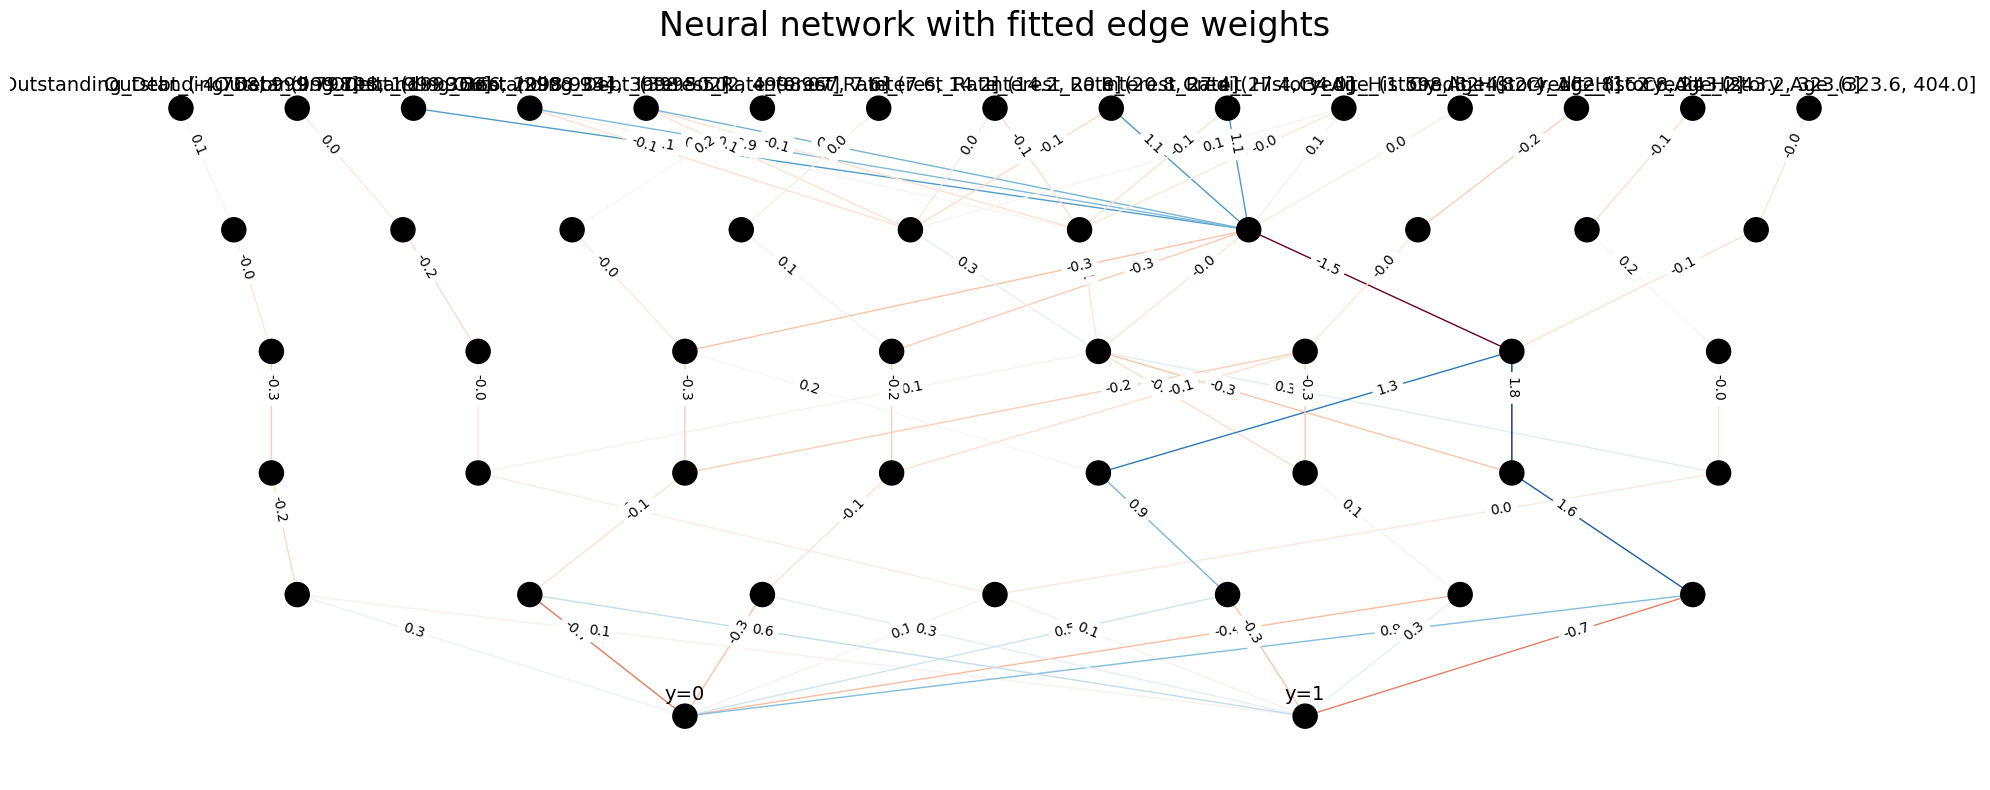

In [110]:
visualizer(cn_1,save=True)

## Quantile binarization

Try to make more accurate binarization

In [114]:
X_final2 = X[importance_1[:5].feature_names.values].copy()
X_final2['Delay_from_due_date'] = pd.cut(X_final2['Delay_from_due_date'],bins = [-np.inf,0,30,60,90,np.inf])
X_final2['Outstanding_Debt'] = pd.cut(X_final2['Outstanding_Debt'],bins = [-np.inf,0,1000,2000,3000,4000,np.inf] )
columns = ['Interest_Rate', 'Credit_History_Age', 'Num_Credit_Inquiries']
X_bin2 = custom_functions.binarizer(X_final2,3,columns,method='q')
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_bin2, y_bin, test_size=0.2, random_state=42,stratify=y_bin)

In [115]:
K_train_2, L_2, cn_2 = build_ConceptNetwork(X_train2, y_train2, concepts_count=15)

In [116]:
cn_2.fit(X_train2, y_train2)

print('Class predictions \n', cn_2.predict(X_test2).numpy().astype(bool))
print('True classes \n', y_test2.values)

print("\nF1 score =", f1_score(y_test2.values, cn_2.predict(X_test2).numpy()))

Class predictions 
 [False  True  True ... False  True  True]
True classes 
 [0 1 1 ... 1 0 1]

F1 score = 0.6308086351994145


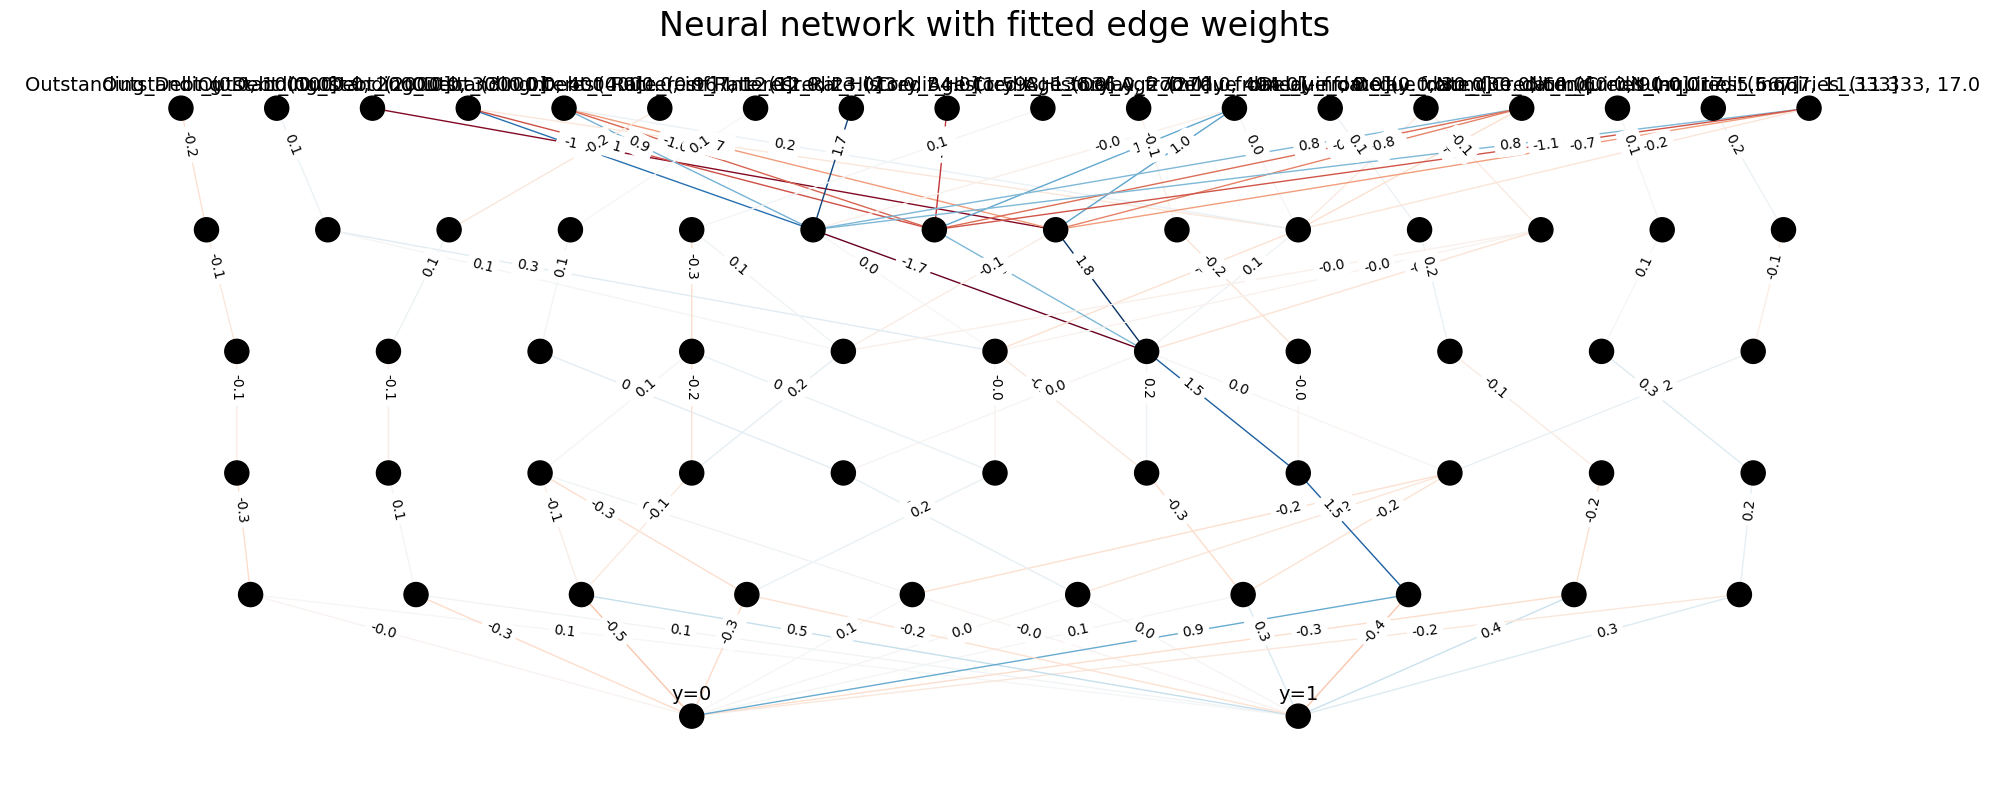

In [117]:
visualizer(cn_2,save=True)

## Adding Non-linearity

In [118]:
cn_0.fit(X_train0, y_train0, nonlinearity=torch.nn.Tanh)

print('Class predictions \n', cn_0.predict(X_test0).numpy().astype(bool))
print('True classes \n', y_test0.values)
print("\nF1 score =", f1_score(y_test0.values, cn_0.predict(X_test0).numpy()))

Class predictions 
 [False  True  True ...  True False  True]
True classes 
 [0 1 1 ... 1 0 1]

F1 score = 0.6396166785605056


In [119]:
cn_1.fit(X_train1, y_train1, nonlinearity=torch.nn.Tanh)

print('Class predictions \n', cn_1.predict(X_test1).numpy().astype(bool))
print('True classes \n', y_test1.values)
print("\nF1 score =", f1_score(y_test1.values, cn_1.predict(X_test1).numpy()))

Class predictions 
 [False False  True ...  True False  True]
True classes 
 [0 1 1 ... 1 0 1]

F1 score = 0.6263402791826825


In [120]:
cn_2.fit(X_train2, y_train2, nonlinearity=torch.nn.Tanh)

print('Class predictions \n', cn_2.predict(X_test2).numpy().astype(bool))
print('True classes \n', y_test2.values)
print("\nF1 score =", f1_score(y_test2.values, cn_2.predict(X_test2).numpy()))

Class predictions 
 [False  True  True ...  True False  True]
True classes 
 [0 1 1 ... 1 0 1]

F1 score = 0.6146372373006653


# Rough work